## 2nd  Model : Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns

# Figures inline 
%matplotlib inline
# set visualization style
sns.set()

In [30]:
from sklearn.linear_model import LogisticRegression

# Model Assessment: Cross Validation
from sklearn.model_selection import KFold
# For Logistic Regression
from sklearn.metrics import accuracy_score
# Metric for imbalanced datasets
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
train_identity    = pd.read_csv("data/train_identity.csv")
train_transaction = pd.read_csv("data/train_transaction.csv")
test_identity     = pd.read_csv("data/test_identity.csv")
test_transaction  = pd.read_csv("data/test_transaction.csv")

In [41]:
#print(train_transaction.ProductCD.unique())
#train_transaction = pd.get_dummies( train_transaction, columns = ['ProductCD'] )

#print(test_transaction.ProductCD.unique())
#test_transaction = pd.get_dummies( test_transaction, columns = ['ProductCD'] )

train_transaction.columns

['W' 'C' 'S' 'H' 'R']


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V335', 'V336', 'V337', 'V338', 'V339', 'ProductCD_C', 'ProductCD_H',
       'ProductCD_R', 'ProductCD_S', 'ProductCD_W'],
      dtype='object', length=398)

In [42]:
kfold = KFold(5, False, 2)

feature_cols=['TransactionAmt', 'card1',
                'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W']

X = train_transaction[feature_cols]
y = train_transaction.isFraud

linear_model = LogisticRegression(random_state=1)

accuracy_scores = []

for train_index, test_index in kfold.split(X):
    
    train_x, test_x, train_y, test_y = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    linear_model.fit(train_x, train_y)  
    #predicted_lin_train = linear_model.predict(test_x)
    predicted_lin_train_prob = linear_model.predict_proba(test_x)
    # keep probabilities for the positive outcome only
    predicted_lin_train_prob = predicted_lin_train_prob[:, 1]

    #acc_score = accuracy_score(test_y, predicted_lin_train)
    #print(acc_score)
    #accuracy_scores.append(acc_score)
    
    # calculate AUC
    auc = roc_auc_score(test_y, predicted_lin_train_prob)
    print('AUC: %.3f' % auc)
    accuracy_scores.append(auc)

#print("Mean: " + str(accuracy_scores.mean()))
#print("Std: " + str(accuracy_scores.std()))

/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.644


/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.718


/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.699


/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.718


/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.707


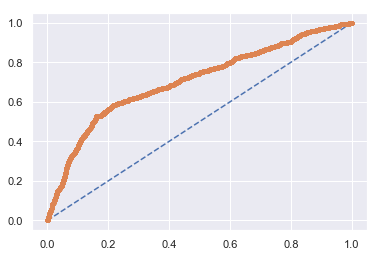

In [43]:
# calculate roc curve

fpr, tpr, thresholds = roc_curve(test_y, predicted_lin_train_prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Make Predictions

In [44]:
predicted_lin = linear_model.predict_proba(test_transaction[feature_cols])

In [45]:
predicted_lin

array([[0.98144696, 0.01855304],
       [0.97298812, 0.02701188],
       [0.97177565, 0.02822435],
       ...,
       [0.98717723, 0.01282277],
       [0.98619552, 0.01380448],
       [0.87576656, 0.12423344]])

In [46]:
test_transaction['isFraud'] = predicted_lin[:,1]

test_transaction[['TransactionID', 'isFraud']].to_csv('predictions/log_reg_productcd.csv', index=False)

#no_fraud.csv: Score: 0.500
#log_reg.csv: Score: 0.5290
#log_reg_productcd.csv: Score: 0.7518

In [47]:
test_transaction[['TransactionID', 'isFraud']].head(100)

,TransactionID,isFraud
0,3663549,0.018553
1,3663550,0.027012
2,3663551,0.028224
3,3663552,0.020146
4,3663553,0.011916
5,3663554,0.016221
6,3663555,0.013132
7,3663556,0.016550
8,3663557,0.030235
9,3663558,0.016972
